In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [107]:
df=pd.read_csv("h1b_cleaned_data.csv")

In [109]:
df.head()

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,BEGIN_DATE,END_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,AGREE_TO_LC_STATEMENT,TOTAL_WORKSITE_LOCATIONS
0,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-07,H-1B,Engineering,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,100000.00,Year,95118.0,Year,IV,No,No,Yes,1.0
1,Certified,2019-09-25,2019-10-01,2020-01-08,2023-01-07,H-1B,IT & Software,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,TN,38.57,Hour,39.0,Hour,II,Yes,No,Yes,1.0
2,Certified,2019-09-25,2019-10-01,2019-10-03,2022-10-02,H-1B,Engineering,17-2141,MECHANICAL ENGINEERS,Y,...,MI,43.50,Hour,39.0,Hour,II,Yes,No,Yes,1.0
3,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-01,H-1B,IT & Software,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,MI,57.69,Hour,53.0,Hour,IV,Yes,No,Yes,1.0
4,Certified,2019-09-25,2019-10-01,2019-10-09,2022-10-08,H-1B,Engineering,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,75000.00,Year,65333.0,Year,II,Yes,No,Yes,1.0


In [111]:
df.shape

(2590760, 33)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590760 entries, 0 to 2590759
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   CASE_STATUS                 object 
 1   RECEIVED_DATE               object 
 2   DECISION_DATE               object 
 3   BEGIN_DATE                  object 
 4   END_DATE                    object 
 5   VISA_CLASS                  object 
 6   JOB_TITLE                   object 
 7   SOC_CODE                    object 
 8   SOC_TITLE                   object 
 9   FULL_TIME_POSITION          object 
 10  TOTAL_WORKER_POSITIONS      int64  
 11  NEW_EMPLOYMENT              int64  
 12  CONTINUED_EMPLOYMENT        int64  
 13  CHANGE_PREVIOUS_EMPLOYMENT  int64  
 14  CHANGE_EMPLOYER             int64  
 15  NEW_CONCURRENT_EMPLOYMENT   int64  
 16  AMENDED_PETITION            int64  
 17  EMPLOYER_NAME               object 
 18  EMPLOYER_CITY               object 
 19  EMPLOYER_STATE       

In [115]:
# Convert object columns to datetime
date_cols = ['RECEIVED_DATE','DECISION_DATE', 'BEGIN_DATE', 'END_DATE']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [116]:
# Keep only H-1B cases for modeling
df = df[df['VISA_CLASS'] == 'H-1B']


In [117]:
df

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,BEGIN_DATE,END_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,AGREE_TO_LC_STATEMENT,TOTAL_WORKSITE_LOCATIONS
0,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-07,H-1B,Engineering,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,100000.00,Year,95118.0,Year,IV,No,No,Yes,1.0
1,Certified,2019-09-25,2019-10-01,2020-01-08,2023-01-07,H-1B,IT & Software,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,TN,38.57,Hour,39.0,Hour,II,Yes,No,Yes,1.0
2,Certified,2019-09-25,2019-10-01,2019-10-03,2022-10-02,H-1B,Engineering,17-2141,MECHANICAL ENGINEERS,Y,...,MI,43.50,Hour,39.0,Hour,II,Yes,No,Yes,1.0
3,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-01,H-1B,IT & Software,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,MI,57.69,Hour,53.0,Hour,IV,Yes,No,Yes,1.0
4,Certified,2019-09-25,2019-10-01,2019-10-09,2022-10-08,H-1B,Engineering,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,75000.00,Year,65333.0,Year,II,Yes,No,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590755,Certified - Withdrawn,2023-10-19,2024-07-01,2023-10-30,2026-10-29,H-1B,Engineering,15-1299.08,Computer Systems Engineers/Architects,Y,...,CA,132000.00,Year,131144.0,Year,II,No,No,Yes,2.0
2590756,Certified,2024-06-24,2024-07-01,2024-08-26,2027-08-25,H-1B,Engineering,17-2072.00,"Electronics Engineers, Except Computer",Y,...,MI,126000.00,Year,91478.0,Year,II,No,No,Yes,2.0
2590757,Certified,2024-06-24,2024-07-01,2024-07-02,2027-07-01,H-1B,Engineering,15-1299.08,Computer Systems Engineers/Architects,Y,...,NC,97406.00,Year,97406.0,Year,III,Yes,No,Yes,1.0
2590758,Certified,2024-06-24,2024-07-01,2024-10-01,2027-09-30,H-1B,IT & Software,15-2051.01,Business Intelligence Analysts,Y,...,CO,124630.00,Year,92560.0,Year,II,No,No,Yes,1.0


In [118]:
df.drop('VISA_CLASS',axis=1,inplace=True)

In [119]:
df.shape

(2525674, 32)

In [120]:
df.describe()

,RECEIVED_DATE,DECISION_DATE,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,NEW_CONCURRENT_EMPLOYMENT,AMENDED_PETITION,NAICS_CODE,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,TOTAL_WORKSITE_LOCATIONS
count,2525674,2525674,2525674,2525674,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06,2.525674e+06
mean,2021-11-10 13:54:19.047684608,2021-11-30 21:27:43.371915008,2022-01-24 00:49:00.031688960,2024-12-29 14:24:11.651480320,1.786056e+00,6.417075e-01,3.703154e-01,1.536271e-01,3.144634e-01,9.618819e-03,2.999686e-01,4.240418e+05,1.097105e+05,9.458669e+04,1.437892e+00
min,2016-04-27 00:00:00,2019-10-01 00:00:00,2016-09-30 00:00:00,2017-10-05 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710210e+05,7.250000e+00,7.250000e+00,1.000000e+00
25%,2020-10-07 00:00:00,2020-10-19 00:00:00,2020-11-16 00:00:00,2023-10-14 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.344130e+05,8.000000e+04,7.402700e+04,1.000000e+00
50%,2021-06-18 00:00:00,2021-07-14 00:00:00,2021-09-27 00:00:00,2024-09-12 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,1.018780e+05,9.353800e+04,1.000000e+00
75%,2022-06-30 00:00:00,2022-07-25 00:00:00,2022-10-01 00:00:00,2025-09-30 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415120e+05,1.350000e+05,1.169380e+05,2.000000e+00
max,2024-09-30 00:00:00,2024-09-30 00:00:00,2025-04-01 00:00:00,2028-03-31 00:00:00,4.500000e+02,4.500000e+02,2.000000e+02,1.000000e+02,2.750000e+02,1.700000e+02,3.000000e+02,5.698555e+06,1.204781e+09,8.108500e+05,1.000000e+01
std,NaN,NaN,NaN,NaN,6.061530e+00,3.812748e+00,2.643438e+00,1.257956e+00,1.659706e+00,2.011266e-01,1.414271e+00,2.086250e+05,7.715320e+05,4.059678e+04,6.986435e-01


In [121]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
Certified                2350706
Certified - Withdrawn     115043
Withdrawn                  46079
Denied                     13846
Name: count, dtype: int64

<Axes: xlabel='CASE_STATUS', ylabel='Count'>

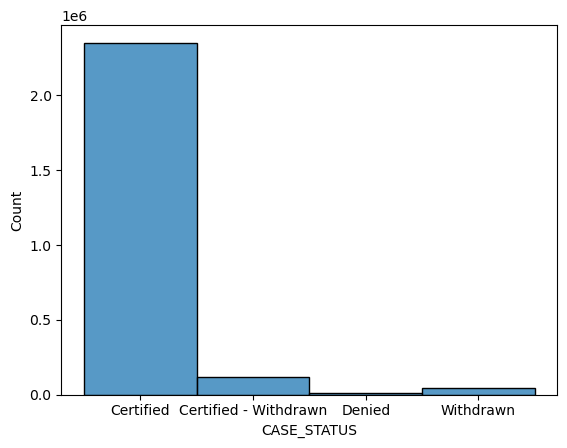

In [122]:
sns.histplot(df['CASE_STATUS'])

In [123]:
df['JOB_TITLE'].value_counts()

JOB_TITLE
Engineering             1020838
IT & Software            815635
Management               271085
Other                    123053
Healthcare               111200
Research & Science        73791
Education                 63195
Finance & Accounting      34111
Marketing & Sales          8306
Legal                      4460
Name: count, dtype: int64

In [124]:
df['SOC_TITLE'].value_counts()

SOC_TITLE
Software Developers, Applications                                618196
Software Developers                                              207444
Computer Systems Analysts                                        147919
Software Developers, Systems Software                            115110
Computer Systems Engineers/Architects                            100265
                                                                  ...  
COMPUTER, OCCUPATIONS, ALL OTHER                                      1
Software Devleopers, Applications                                     1
Electronics Engineers, except computers                               1
Janitors and Cleaners, Except Maids and Housekeeping Cleaners         1
Maintenance Workers, Machinery                                        1
Name: count, Length: 1777, dtype: int64

In [125]:
def map_soc_title(title):
    title = title.lower()
    if "developer" in title or "software" in title:
        return "Software Development"
    elif "analyst" in title or "scientist" in title:
        return "Data & Analytics"
    elif "engineer" in title:
        return "Engineering"
    elif "accountant" in title or "financial" in title:
        return "Finance & Accounting"
    elif "manager" in title or "executive" in title:
        return "Management"
    elif "teacher" in title or "professor" in title:
        return "Education"
    elif "architect" in title:
        return "Architecture"
    elif "lawyer" in title or "physician" in title or "dentist" in title:
        return "Healthcare & Legal"
    else:
        return "Other"

df['SOC_TITLE']=df['SOC_TITLE'].apply(map_soc_title)

In [126]:
df['SOC_TITLE'].value_counts()

SOC_TITLE
Software Development    1024790
Data & Analytics         446419
Other                    371828
Engineering              342701
Management               163060
Education                 64037
Finance & Accounting      49339
Healthcare & Legal        33382
Architecture              30118
Name: count, dtype: int64

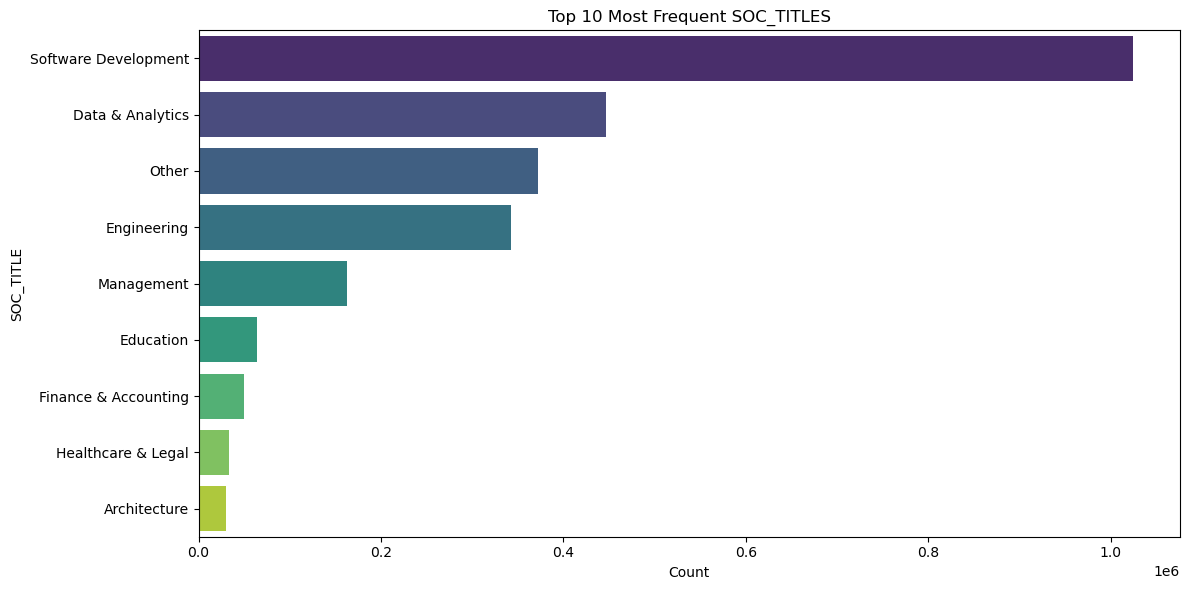

In [127]:
# Get top 10 most frequent SOC_TITLE values
top_soc = df['SOC_TITLE'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_soc.values, y=top_soc.index, palette='viridis')
plt.title('Top 10 Most Frequent SOC_TITLES')
plt.xlabel('Count')
plt.ylabel('SOC_TITLE')
plt.tight_layout()
plt.show()


In [128]:
df['FULL_TIME_POSITION'].value_counts()

FULL_TIME_POSITION
Y    2485412
N      40262
Name: count, dtype: int64

In [131]:
# Step 1: Convert to datetime
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'], errors='coerce')

# Step 2: Extract year
df['YEAR'] = df['RECEIVED_DATE'].dt.year


In [132]:
df['YEAR'].value_counts()

YEAR
2020    710438
2021    686777
2022    479282
2024    430898
2019    115757
2023    100543
2018      1111
2017       729
2016       139
Name: count, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525674 entries, 0 to 2590759
Data columns (total 33 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   JOB_TITLE                   object        
 6   SOC_CODE                    object        
 7   SOC_TITLE                   object        
 8   FULL_TIME_POSITION          object        
 9   TOTAL_WORKER_POSITIONS      int64         
 10  NEW_EMPLOYMENT              int64         
 11  CONTINUED_EMPLOYMENT        int64         
 12  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 13  CHANGE_EMPLOYER             int64         
 14  NEW_CONCURRENT_EMPLOYMENT   int64         
 15  AMENDED_PETITION            int64         
 16  EMPLOYER_NAME          

In [136]:
df['EMPLOYER_NAME'].value_counts().head(20)

EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    73478
Google LLC                                42352
Microsoft Corporation                     39974
Ernst & Young U.S. LLP                    38117
Amazon.com Services LLC                   35537
INFOSYS LIMITED                           30505
TATA CONSULTANCY SERVICES LIMITED         29236
Accenture LLP                             18364
AMAZON.COM SERVICES LLC                   18096
Apple Inc.                                17160
Deloitte Consulting LLP                   16254
CAPGEMINI AMERICA INC                     16211
Tata Consultancy Services Limited         15742
Intel Corporation                         15376
WAL-MART ASSOCIATES, INC.                 15348
WIPRO LIMITED                             11427
COMPUNNEL SOFTWARE GROUP, INC              9801
Amazon Web Services, Inc.                  9731
HCL AMERICA, INC.                          9561
IBM Corporation                            9493
Name: count, dtype: int64

In [137]:
import re

def clean_employer_name(name):
    name = name.upper()
    name = re.sub(r'[^\w\s]', '', name)  # remove punctuation
    name = name.strip()

    # Map known duplicates to a standard name
    mapping = {
        'AMAZONCOM SERVICES LLC': 'AMAZON',
        'AMAZON WEB SERVICES INC': 'AMAZON',
        'TATA CONSULTANCY SERVICES LIMITED': 'TCS',
        'TATA CONSULTANCY SERVICES LIMITED': 'TCS',
        'TATA CONSULTANCY SERVICES LTD': 'TCS',
        'TCS LIMITED': 'TCS',
        'ERNST & YOUNG US LLP': 'ERNST & YOUNG',
        'ERNST YOUNG US LLP': 'ERNST & YOUNG',
        'WALMART ASSOCIATES INC': 'WALMART',
        'WAL-MART ASSOCIATES INC': 'WALMART',
        'META PLATFORMS INC':'META',
        'FACEBOOK INC':'META'
        
    }

    # Standardize cleaned name using the mapping
    return mapping.get(name, name)

# Apply the function
df['EMPLOYER_NAME_CLEANED'] = df['EMPLOYER_NAME'].apply(clean_employer_name)

In [138]:
top_20_employers=df['EMPLOYER_NAME_CLEANED'].value_counts().head(20)

In [140]:
df['EMPLOYER'] = df['EMPLOYER_NAME_CLEANED'].apply(
    lambda x: x if x in top_20_employers else 'OTHER')

In [141]:
df['EMPLOYER'].value_counts()

EMPLOYER
OTHER                                     1973111
COGNIZANT TECHNOLOGY SOLUTIONS US CORP      73479
AMAZON                                      69664
GOOGLE LLC                                  46108
TCS                                         44982
MICROSOFT CORPORATION                       40182
ERNST  YOUNG US LLP                         38215
INFOSYS LIMITED                             30559
META                                        26642
DELOITTE CONSULTING LLP                     21724
APPLE INC                                   19226
HCL AMERICA INC                             19053
ACCENTURE LLP                               18896
CAPGEMINI AMERICA INC                       18270
INTEL CORPORATION                           15458
WALMART                                     15351
JPMORGAN CHASE  CO                          14255
WIPRO LIMITED                               11428
COMPUNNEL SOFTWARE GROUP INC                 9955
IBM CORPORATION                          

In [142]:
df['AGREE_TO_LC_STATEMENT'].value_counts()

AGREE_TO_LC_STATEMENT
Yes    2525674
Name: count, dtype: int64

In [143]:
df['TOTAL_WORKSITE_LOCATIONS'].value_counts()

TOTAL_WORKSITE_LOCATIONS
1.0     1585020
2.0      834535
3.0       79831
4.0       13927
5.0        4844
6.0        2665
10.0       1786
7.0        1249
9.0        1006
8.0         811
Name: count, dtype: int64

In [144]:
df['AMENDED_PETITION'].value_counts()

AMENDED_PETITION
0      2058697
1       423068
5         9133
2         8778
10        6176
4         5879
3         5546
25        4217
15        3197
6          337
20         330
8           95
11          65
35          57
50          41
30          32
40           9
7            5
16           5
9            2
13           2
100          1
300          1
19           1
Name: count, dtype: int64

In [145]:
df['CHANGE_EMPLOYER'].value_counts()

CHANGE_EMPLOYER
0      1959130
1       531060
5        10267
2         8209
4         5907
10        3706
15        3285
3         1781
20         483
25         394
6          378
50         349
100        285
30         192
8          144
7           22
9           15
75          10
200          9
14           9
33           7
150          6
13           5
12           5
40           5
275          3
22           3
11           2
60           2
19           1
Name: count, dtype: int64

In [146]:
df['AMENDED_PETITION'] =df['AMENDED_PETITION'].apply(lambda x: 1 if x != 0 else 0)
df['CHANGE_EMPLOYER'] = df['CHANGE_EMPLOYER'].apply(lambda x: 1 if x != 0 else 0)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525674 entries, 0 to 2590759
Data columns (total 35 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   JOB_TITLE                   object        
 6   SOC_CODE                    object        
 7   SOC_TITLE                   object        
 8   FULL_TIME_POSITION          object        
 9   TOTAL_WORKER_POSITIONS      int64         
 10  NEW_EMPLOYMENT              int64         
 11  CONTINUED_EMPLOYMENT        int64         
 12  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 13  CHANGE_EMPLOYER             int64         
 14  NEW_CONCURRENT_EMPLOYMENT   int64         
 15  AMENDED_PETITION            int64         
 16  EMPLOYER_NAME          

In [149]:
df['EMPLOYER_NAME_CLEANED'].value_counts()

EMPLOYER_NAME_CLEANED
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    73479
AMAZON                                    69664
GOOGLE LLC                                46108
TCS                                       44982
MICROSOFT CORPORATION                     40182
                                          ...  
LAHITA ENGINEERING LLC                        1
RASTELLI BROS INC                             1
MAPP DIGITAL US LLC                           1
SUN KPO INC                                   1
PI CUBE LLC                                   1
Name: count, Length: 122245, dtype: int64

In [150]:
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia',
    'PR': 'Puerto Rico', 'VI': 'Virgin Islands', 'GU': 'Guam',
    'MP': 'Northern Mariana Islands', 'AS': 'American Samoa', 'FM': 'Micronesia'
}

# Create new column with full state name
df['EMPLOYER_STATE_FULL'] = df['EMPLOYER_STATE'].map(us_state_abbrev)

In [151]:
df['EMPLOYER'].value_counts()

EMPLOYER
OTHER                                     1973111
COGNIZANT TECHNOLOGY SOLUTIONS US CORP      73479
AMAZON                                      69664
GOOGLE LLC                                  46108
TCS                                         44982
MICROSOFT CORPORATION                       40182
ERNST  YOUNG US LLP                         38215
INFOSYS LIMITED                             30559
META                                        26642
DELOITTE CONSULTING LLP                     21724
APPLE INC                                   19226
HCL AMERICA INC                             19053
ACCENTURE LLP                               18896
CAPGEMINI AMERICA INC                       18270
INTEL CORPORATION                           15458
WALMART                                     15351
JPMORGAN CHASE  CO                          14255
WIPRO LIMITED                               11428
COMPUNNEL SOFTWARE GROUP INC                 9955
IBM CORPORATION                          

In [152]:
#employement duration in days
df['EMPLOYMENT_DURATION_DAYS'] = (df['END_DATE'] - df['BEGIN_DATE']).dt.days

In [153]:
df.shape

(2525674, 37)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525674 entries, 0 to 2590759
Data columns (total 37 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   JOB_TITLE                   object        
 6   SOC_CODE                    object        
 7   SOC_TITLE                   object        
 8   FULL_TIME_POSITION          object        
 9   TOTAL_WORKER_POSITIONS      int64         
 10  NEW_EMPLOYMENT              int64         
 11  CONTINUED_EMPLOYMENT        int64         
 12  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 13  CHANGE_EMPLOYER             int64         
 14  NEW_CONCURRENT_EMPLOYMENT   int64         
 15  AMENDED_PETITION            int64         
 16  EMPLOYER_NAME          

In [155]:
df['H1B_DEPENDENT'].value_counts()

H1B_DEPENDENT
No     1874715
Yes     650959
Name: count, dtype: int64

In [156]:
df['TOTAL_WORKER_POSITIONS'].value_counts().head(60)

TOTAL_WORKER_POSITIONS
1      2404524
10       23020
3        17880
5        15153
25       14786
6        10863
20        9983
50        7338
2         6082
100       3317
30        3260
40        1908
15        1873
4         1493
8          973
24         747
7          281
200        259
60         242
75         232
32         223
12         202
35         142
9           91
150         80
16          80
250         75
99          74
80          72
11          47
14          43
55          41
13          37
125         36
18          30
17          25
45          20
42          20
70          17
36           9
28           8
19           7
65           6
49           6
275          6
23           5
175          5
46           5
22           5
450          4
21           4
300          3
34           3
85           3
26           3
71           2
66           2
29           2
90           2
44           2
Name: count, dtype: int64

In [157]:
def bin_worker_positions(x):
    if x == 1:
        return 'Single'
    elif x <= 5:
        return 'Small (2–5)'
    elif x <= 25:
        return 'Medium (6–25)'
    elif x <= 100:
        return 'Large (26–100)'
    else:
        return 'Very Large (>100)'

df['WORKER_COUNT_BIN'] = df['TOTAL_WORKER_POSITIONS'].apply(bin_worker_positions)


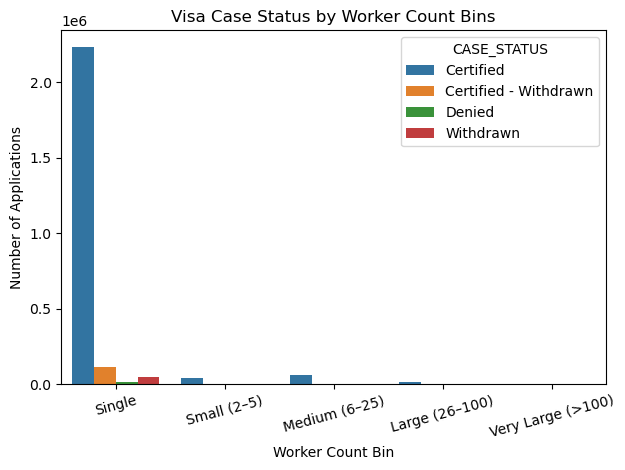

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='WORKER_COUNT_BIN', hue='CASE_STATUS', order=[
    'Single', 'Small (2–5)', 'Medium (6–25)', 'Large (26–100)', 'Very Large (>100)'
])
plt.title('Visa Case Status by Worker Count Bins')
plt.xlabel('Worker Count Bin')
plt.ylabel('Number of Applications')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [160]:
df['WORKER_COUNT_BIN'] = df['WORKER_COUNT_BIN'].replace({
    'Small (2–5)': 'Multiple',
    'Medium (6–25)': 'Multiple',
    'Large (26–100)': 'Multiple',
    'Very Large (>100)': 'Multiple'
})


<Axes: xlabel='WORKER_COUNT_BIN', ylabel='count'>

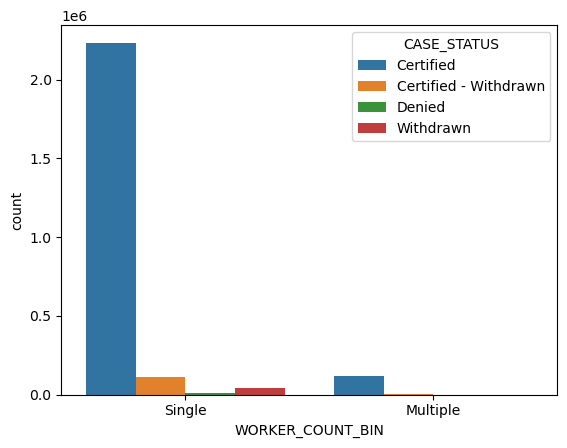

In [161]:
sns.countplot(data=df, x='WORKER_COUNT_BIN', hue='CASE_STATUS', order=['Single', 'Multiple'])


In [162]:
# Step 1: Replace "GEORGIA" with "UNITED STATES OF AMERICA"
df['EMPLOYER_COUNTRY'] =df['EMPLOYER_COUNTRY'].replace('GEORGIA', 'UNITED STATES OF AMERICA')

# Step 2: Keep only rows where country is USA
df = df[df['EMPLOYER_COUNTRY'] == 'UNITED STATES OF AMERICA']


In [163]:
df['EMPLOYER_COUNTRY'].value_counts()

EMPLOYER_COUNTRY
UNITED STATES OF AMERICA    2525609
Name: count, dtype: int64

In [164]:
df.drop('EMPLOYER_COUNTRY',axis=1,inplace=True)

In [165]:
df['EMPLOYER_CITY'].value_counts()[60:120]

EMPLOYER_CITY
Schaumburg          7454
Irvine              7448
Newark              7236
Fremont             7167
Iselin              7130
Wilmington          6938
CHARLOTTE           6936
Indianapolis        6757
Redwood City        6666
PRINCETON           6654
BOSTON              6526
Richmond            6183
Dublin              6155
San Mateo           6120
Frisco              6082
Herndon             5996
Bellevue            5956
Columbus            5874
HERNDON             5671
DALLAS              5667
Fairfax             5613
Piscataway          5568
Washington          5488
WOBURN              5476
SANTA CLARA         5431
Detroit             5401
Phoenix             5312
ARLINGTON           5283
Moon Township       5175
ATLANTA             5173
Pleasanton          5161
Tampa               5151
New York            4947
Richardson          4930
Columbia            4912
Farmington Hills    4901
Riverwoods          4869
San Francisco       4789
Southfield          4744
SOUTH PLAIN

In [167]:
df['EMPLOYER_CITY'] =df['EMPLOYER_CITY'].str.upper().str.strip()

In [169]:
df['EMPLOYER_CITY'].value_counts().head(60)

EMPLOYER_CITY
NEW YORK            126083
SEATTLE              93453
CHICAGO              81105
COLLEGE STATION      75459
SAN FRANCISCO        65306
MOUNTAIN VIEW        61391
SANTA CLARA          52882
SAN JOSE             50561
ROCKVILLE            49128
REDMOND              43281
PHILADELPHIA         43016
RICHARDSON           39991
SECAUCUS             39181
BOSTON               36332
SUNNYVALE            33203
EDISON               31875
HOUSTON              30791
MENLO PARK           29807
IRVING               27971
DURHAM               25743
DALLAS               22429
ATLANTA              21611
TROY                 21194
CUPERTINO            19993
AUSTIN               19519
SAN DIEGO            19276
PRINCETON            19148
TAMPA                17195
ALPHARETTA           16952
BENTONVILLE          16837
CHARLOTTE            15900
PLANO                15374
PALO ALTO            14735
PISCATAWAY           14666
JERSEY CITY          14123
EAST BRUNSWICK       13467
PLAINSBORO    

In [170]:
print(df['EMPLOYER_CITY'].nunique())


7495


In [171]:
df['NEW_CONCURRENT_EMPLOYMENT'] =df['NEW_CONCURRENT_EMPLOYMENT'].apply(lambda x: 1 if x > 0 else 0)

In [172]:
df['NEW_CONCURRENT_EMPLOYMENT'].value_counts()

NEW_CONCURRENT_EMPLOYMENT
0    2507917
1      17692
Name: count, dtype: int64

In [174]:
df['WAGE_RATE_OF_PAY_FROM'].value_counts().head(60)

WAGE_RATE_OF_PAY_FROM
120000.0    34051
100000.0    29794
110000.0    28321
90000.0     27603
130000.0    26964
150000.0    25696
125000.0    24642
140000.0    23616
80000.0     21845
160000.0    21703
95000.0     21420
115000.0    20848
135000.0    19476
85000.0     18320
105000.0    17531
145000.0    14905
75000.0     14252
60000.0     14243
170000.0    12868
70000.0     12768
175000.0    12216
155000.0    11926
180000.0    11622
165000.0    11463
200000.0    10793
65000.0     10004
94037.0      8119
190000.0     7946
185000.0     7565
102000.0     6993
92000.0      6688
82000.0      6565
78000.0      6118
88000.0      5881
93558.0      5764
101192.0     5660
86000.0      5625
97000.0      5406
96000.0      5178
79768.0      5071
72000.0      5070
84000.0      4972
112000.0     4960
98000.0      4940
100526.0     4872
94000.0      4764
108000.0     4696
250000.0     4650
91000.0      4589
220000.0     4565
210000.0     4529
96595.0      4465
93000.0      4346
118000.0     4300
101754

In [175]:
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming", "DC": "District of Columbia",
    "GU": "Guam", "MP": "Northern Mariana Islands", "PR": "Puerto Rico",
    "VI": "U.S. Virgin Islands"
}

df['WORKSITE_STATE'] =df['WORKSITE_STATE'].map(state_mapping)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525609 entries, 0 to 2590759
Data columns (total 37 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   JOB_TITLE                   object        
 6   SOC_CODE                    object        
 7   SOC_TITLE                   object        
 8   FULL_TIME_POSITION          object        
 9   TOTAL_WORKER_POSITIONS      int64         
 10  NEW_EMPLOYMENT              int64         
 11  CONTINUED_EMPLOYMENT        int64         
 12  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 13  CHANGE_EMPLOYER             int64         
 14  NEW_CONCURRENT_EMPLOYMENT   int64         
 15  AMENDED_PETITION            int64         
 16  EMPLOYER_NAME          

In [177]:
len(df['EMPLOYER_NAME_CLEANED'].value_counts())


122234

In [178]:
df['EMPLOYER'].value_counts()

EMPLOYER
OTHER                                     1973046
COGNIZANT TECHNOLOGY SOLUTIONS US CORP      73479
AMAZON                                      69664
GOOGLE LLC                                  46108
TCS                                         44982
MICROSOFT CORPORATION                       40182
ERNST  YOUNG US LLP                         38215
INFOSYS LIMITED                             30559
META                                        26642
DELOITTE CONSULTING LLP                     21724
APPLE INC                                   19226
HCL AMERICA INC                             19053
ACCENTURE LLP                               18896
CAPGEMINI AMERICA INC                       18270
INTEL CORPORATION                           15458
WALMART                                     15351
JPMORGAN CHASE  CO                          14255
WIPRO LIMITED                               11428
COMPUNNEL SOFTWARE GROUP INC                 9955
IBM CORPORATION                          

<Axes: ylabel='WAGE_RATE_OF_PAY_FROM'>

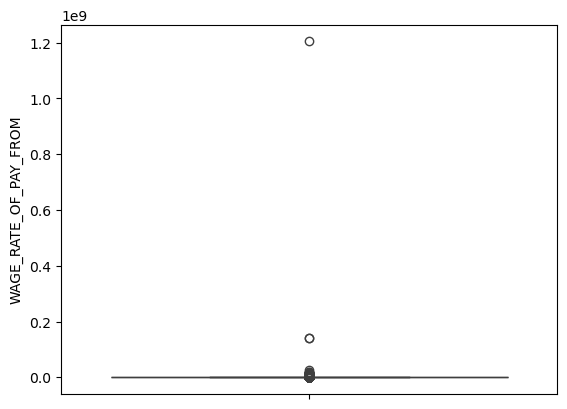

In [179]:
sns.boxplot(df['WAGE_RATE_OF_PAY_FROM'])

In [180]:
# Cap wages at 99th percentile (optional)
cap = df['WAGE_RATE_OF_PAY_FROM'].quantile(0.99)
df['WAGE_RATE_OF_PAY_FROM'] = np.where(
    df['WAGE_RATE_OF_PAY_FROM'] > cap, cap, df['WAGE_RATE_OF_PAY_FROM']
)


In [182]:
def normalize_wage(row):
        unit = row['WAGE_UNIT_OF_PAY']
        wage = row['WAGE_RATE_OF_PAY_FROM']
        if unit == 'Hour':
            return wage * 40 * 52
        elif unit == 'Week':
            return wage * 52
        elif unit == 'Bi-Weekly':
            return wage * 26
        elif unit == 'Month':
            return wage * 12
        elif unit == 'Year':
            return wage
        else:
            return np.nan
df['ANNUAL_WAGE'] = df.apply(normalize_wage, axis=1)

In [183]:
df['WAGE_RATE_OF_PAY_FROM'].describe()

count    2.525609e+06
mean     1.080032e+05
std      4.946955e+04
min      7.250000e+00
25%      8.000000e+04
50%      1.018795e+05
75%      1.350000e+05
max      2.650000e+05
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64

In [185]:
df['ANNUAL_WAGE']

0          100000.0
1           80225.6
2           90480.0
3          119995.2
4           75000.0
             ...   
2590755    132000.0
2590756    126000.0
2590757     97406.0
2590758    124630.0
2590759    150502.0
Name: ANNUAL_WAGE, Length: 2525609, dtype: float64

In [186]:
df.drop(columns=['WAGE_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM'],axis=1,inplace=True)

In [187]:
print("PREVAILING WAGE")
df['PREVAILING_WAGE'].describe()

PREVAILING WAGE


count    2.525609e+06
mean     9.458741e+04
std      4.059646e+04
min      7.250000e+00
25%      7.402700e+04
50%      9.353800e+04
75%      1.169380e+05
max      8.108500e+05
Name: PREVAILING_WAGE, dtype: float64

<Axes: ylabel='PREVAILING_WAGE'>

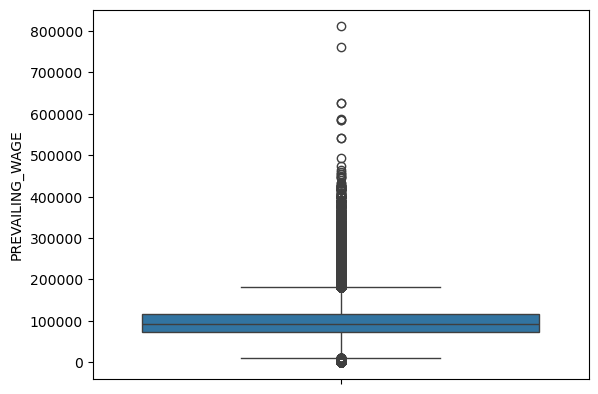

In [188]:
sns.boxplot(df['PREVAILING_WAGE'])

In [189]:
cap_value = df['PREVAILING_WAGE'].quantile(0.995)
df['PREVAILING_WAGE'] = np.where(
    df['PREVAILING_WAGE'] > cap_value,
    cap_value,
    df['PREVAILING_WAGE']
)


<Axes: ylabel='PREVAILING_WAGE'>

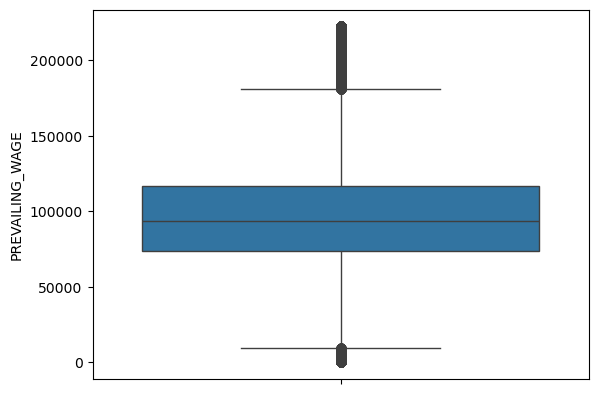

In [190]:
sns.boxplot(df['PREVAILING_WAGE'])

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525609 entries, 0 to 2590759
Data columns (total 36 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   JOB_TITLE                   object        
 6   SOC_CODE                    object        
 7   SOC_TITLE                   object        
 8   FULL_TIME_POSITION          object        
 9   TOTAL_WORKER_POSITIONS      int64         
 10  NEW_EMPLOYMENT              int64         
 11  CONTINUED_EMPLOYMENT        int64         
 12  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 13  CHANGE_EMPLOYER             int64         
 14  NEW_CONCURRENT_EMPLOYMENT   int64         
 15  AMENDED_PETITION            int64         
 16  EMPLOYER_NAME          

In [192]:
df['SOC_TITLE'].unique()

array(['Other', 'Software Development', 'Engineering', 'Data & Analytics',
       'Management', 'Education', 'Healthcare & Legal',
       'Finance & Accounting', 'Architecture'], dtype=object)

In [193]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
Certified                2350657
Certified - Withdrawn     115040
Withdrawn                  46069
Denied                     13843
Name: count, dtype: int64

In [194]:
df['CASE_STATUS_BINARY'] = df['CASE_STATUS'].apply(lambda x: 1 if x == 'Certified' else 0)

In [195]:
df.to_csv("cleaned_and_preprocessed.csv", index=False)